# Forward Euler Solver for Kepler's Laws #

We are going to first use a numerical method to integrate a function.

Starting with a simple derivative:

$\frac{dy}{dx} = x$

we know from basic calculus that if we integrate with respect to x, we recover:

$y = \frac{x^2}{2} + C$

as this is a simple function, we can do this analytically, we can then plot this function:




In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

y_array = []
x_array = np.linspace(1,10,100)

for i in x_array:
    y_array.append((i**2)/2)
    
plt.plot(x_array,y_array)
plt.show()

<Figure size 640x480 with 1 Axes>

But what if our function is not as simple?

We can use the euler method to perform this operation.

If we know our initial conditions, we can use the euler method described in the previous slides.

For our function, the initial conditions we have are that for:

$x = 0$, 

$y(0) = 0$ 

we set C = 0 for this example - in real world applications, this may not always be the case!

Task - write a linear solver to find the integral of:

$\frac{dy}{dx} = x^6$

between x = 0 and x = 10. Your initial conditions are given in the cell.

You will need to look at the slides to help you with this.


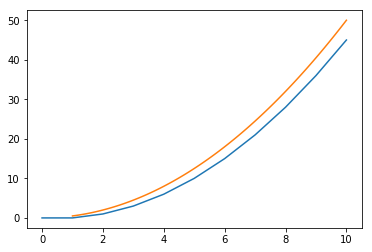

In [30]:
def Euler(x0, xf, y0, h):
    y = [y0]
    x = np.arange(x0, xf+h, h)
    for i in range(len(x)-1):
        temp = y[i] + h * x[i]
        y.append(temp)    
    return x,y

def Euler2(x, y0):
    h = x[1]-x[0]
    y = [y0]
    for i in range(len(x)-1):
        temp = y[i] + h * x[i]
        y.append(temp)    
    return y

y0 = 0
x0 = 0
xf = 10.
h   = 1.

x,y = Euler(x0, xn, y0, h)
x2 = np.arange(x0, xf+h, h)
y2 = Euler2(x2, y0)

z = Euler(x0, xf, y0, h)

plt.plot(x,y)
plt.plot(x_array,y_array)
plt.show()

Now that you have a working solver, see what the effect of changing the h parameter is on the accuracy of your result. this could be done in a for loop, but other methods are possible. You will have to plot the results for different h, along with the analytical result, either on the same plot or in a multiplot.

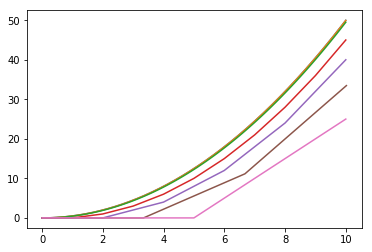

In [22]:
ch = [1e-3, 1e-2, 1e-1, 1e-0, 2., 3.34, 5.]
for i in ch:
    x,y = Euler(x0, xn, y0, i)
    plt.plot(x,y)
plt.show()

For our final task, we are going to make a function which solves the ordinary differential equation of velocity in an orbit.

So long as we know the initial conditions of our system, we can find the solution of our equation by finding the tangent to the slope at small intervals along that slope.

First, define two functions. The first should return the equation:


$  \frac{dx}{dt} = v = \sqrt{{\frac{2GM}{(x^2 + y^2)^\frac{1}{2}}}}$


for a circular orbit in the plane

with x, y and M as arguments to the function.


The second should return the numerical derivative of this function. Recall that the numerical derivative is given  by:

$f^{'}(t) = \frac{dv}{dt}= \frac{f(t+\delta) - f(t)}{\delta}$ 

In [25]:
def vx(x, y, M):
    G = 1.
    np.sqrt(2.*G*M/(x**2.+y**2.)**(0.5))   
    return v

def dvx(t0, h):
    dv = (vx(t0+h)-vx(t0))/h
    
def vy(x, y, M):
    G = 1.
    np.sqrt(2.*G*M/(x**2.+y**2.)**(0.5))   
    return v

def dvy(t0, h):
    dv = (vy(t0+h)-vy(t0))/h

Now that we have the function and its derivative, we are able to use these to calculate the velocity of an orbiting body for a given x, y and m.

The forward Euler method states that, given the initial conditions of an ordinaty differential equation, $y_{0} = f(x_{0})$, subsequent values of y can be calculated by the following method:

$y_{n+1} = y_{n} + hf^{'}(x_{n})$

We can continue to solve for n+1 itteratively from our initial conditions, alowing us to calculate (for the Kepler example) the motion of a particle for any interval of time (although there are problems with the Euler method).

The positions x and y and the velocities in the x and y directions ($v_{x}$ and $v_{y}$) are the four variables which we need to complete this task, along with the acceleration in the x and y directions, for which we wil calculate the numerical derivative.

Our initial x possition will be 0, and our initial y possition 1 AU. Our initial $v_x$ will be 30 km/s, and $v_y$ is 0.

You will have to calculate, for each time step, the velocities $v_x$ and $v_y$ and the accelerations in the x and y direction, and use these in your solver to determine the new positions and velocities for the next step.

Put simply:

1. Calculate the numerical derivative of the velocity equation
2. Use the velocity equation and this acceleration, along with the time step, to determine new x,y,vx and vy
3. Itterate over an array of times intil an end time, t= 5e7 seconds
4. Plot the positions you generate with this method

This is a difficult task, but don't give up!
